In [227]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy import stats
import seaborn as sns
from abc import ABC,abstractmethod

## Binomial distribution

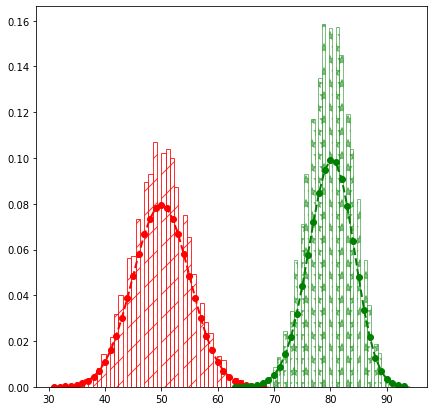

<AxesSubplot:>

In [368]:
binomial_plots =  (
    BinomialDistributionPlot({'n':100,'p':0.5,'size':10000},red_style),  
    BinomialDistributionPlot({'n':100,'p':0.8,'size':10000},green_style),  
)
plot_pdistribution(
    distribution_plots = binomial_plots, 
    show_fx   = True,
    fig_size = (7,7)
)

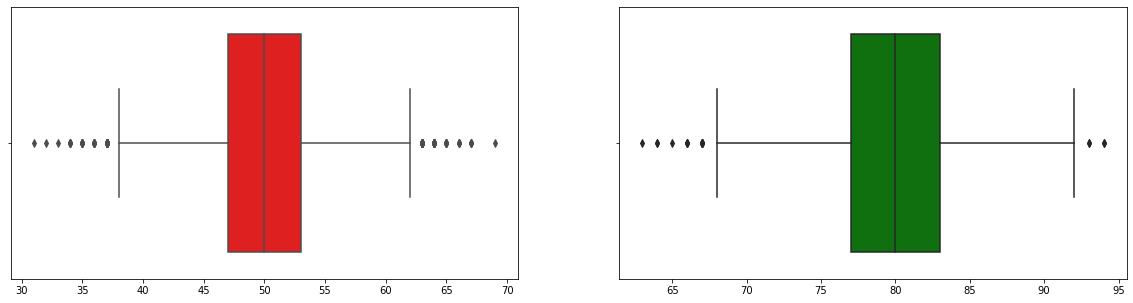

In [258]:
boxplot_pd(binomial_plots)

## Poisson distribution

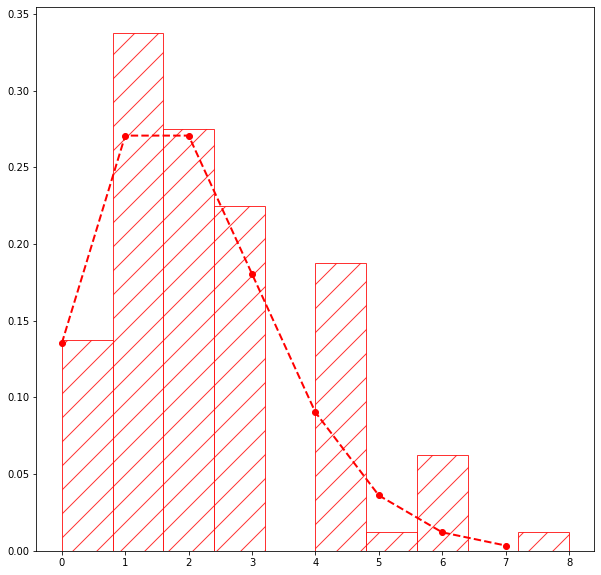

<AxesSubplot:>

In [371]:
poisson_plots = (
    PoissonDistributionPlot({'size':100,'mu':2,'loc':0},red_style),
#     PoissonDistributionPlot({'size':100,'mu':4,'loc':0},blue_style),
#     PoissonDistributionPlot({'size':100,'mu':10,'loc':0},green_style),
)
plot_pdistribution(
    distribution_plots = poisson_plots,
    show_fx            = True, 
    bins               = 10
)

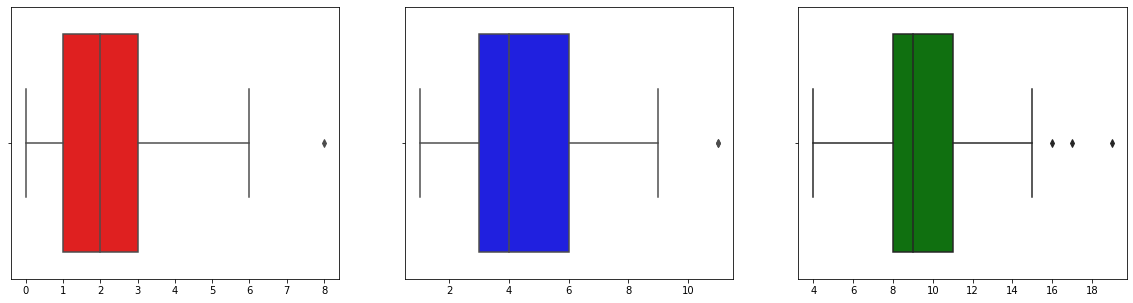

In [370]:
boxplot_pd(poisson_plots)

In [343]:
rs = np.random.RandomState(1234)
mu = 2
x = stats.poisson.rvs(mu,size=100,loc=0,random_state=rs)
# x
stats.poisson.pmf(x,mu)

array([0.27067057, 0.18044704, 0.09022352, 0.18044704, 0.27067057,
       0.09022352, 0.18044704, 0.18044704, 0.27067057, 0.27067057,
       0.18044704, 0.27067057, 0.18044704, 0.27067057, 0.13533528,
       0.27067057, 0.0120298 , 0.27067057, 0.27067057, 0.27067057,
       0.13533528, 0.18044704, 0.27067057, 0.27067057, 0.27067057,
       0.09022352, 0.09022352, 0.09022352, 0.27067057, 0.0120298 ,
       0.13533528, 0.27067057, 0.27067057, 0.18044704, 0.27067057,
       0.0120298 , 0.27067057, 0.27067057, 0.13533528, 0.18044704,
       0.27067057, 0.27067057, 0.27067057, 0.18044704, 0.27067057,
       0.18044704, 0.27067057, 0.0120298 , 0.0120298 , 0.09022352,
       0.18044704, 0.09022352, 0.18044704, 0.27067057, 0.27067057,
       0.27067057, 0.13533528, 0.27067057, 0.00085927, 0.27067057,
       0.27067057, 0.09022352, 0.27067057, 0.27067057, 0.09022352,
       0.27067057, 0.27067057, 0.09022352, 0.18044704, 0.13533528,
       0.13533528, 0.27067057, 0.13533528, 0.27067057, 0.27067

## Guassian distribution

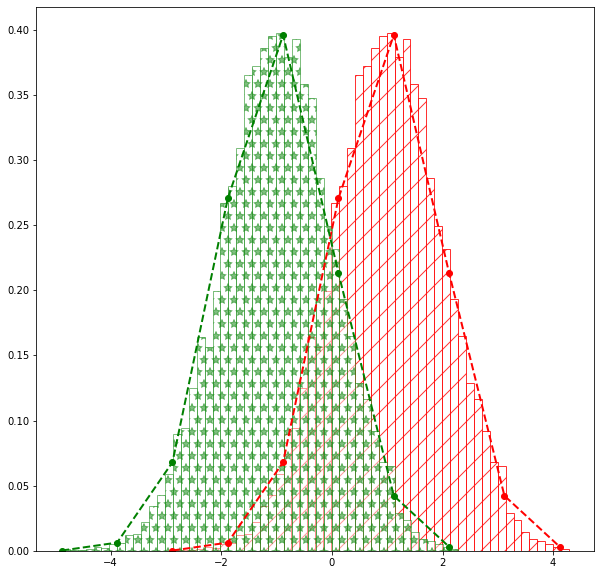

<AxesSubplot:>

In [375]:

normal_plots = (
    GaussianDistributionPlot({'size':10000,'loc':1,'scale':1},red_style),
#     GaussianDistributionPlot({'size':10000,'loc':1,'scale':2},pink_style),
    GaussianDistributionPlot({'size':10000,'loc':-1,'scale':1},green_style),
#     GaussianDistributionPlot({'size':10000,'loc':-1,'scale':2},blue_style),
)
plot_pdistribution(
    distribution_plots = normal_plots,
    show_fx   = True
)

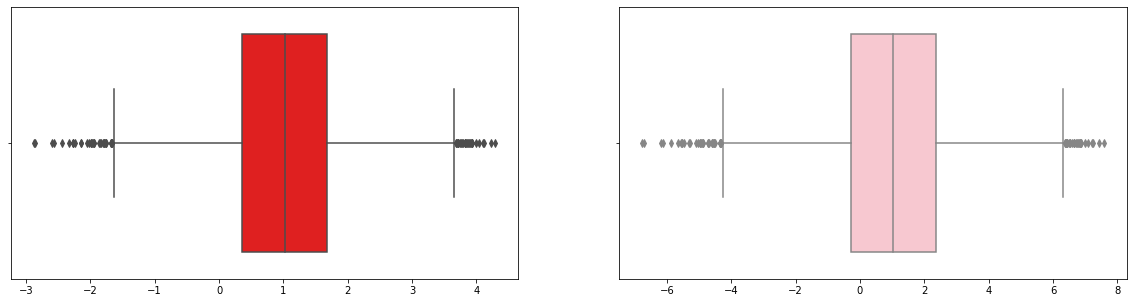

In [374]:
boxplot_pd(normal_plots)

## T-distribution

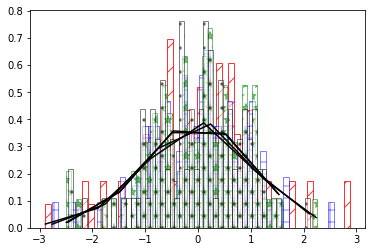

In [46]:
# %matplotlib notebook 
%matplotlib inline
t_plots = (
    TDistributionPlot({'size':100,'df':10,'loc':0,'scale':1},red_style),
    TDistributionPlot({'size':100,'df':20,'loc':0,'scale':1},blue_style),
    TDistributionPlot({'size':100,'df':50,'loc':0,'scale':1},green_style),
    TDistributionPlot({'size':100,'df':100,'loc':0,'scale':1},black_style),
)
plot_pdistribution(
    distribution_plots = t_plots,
    show_fx   = True
)

## Chi-squared distribution

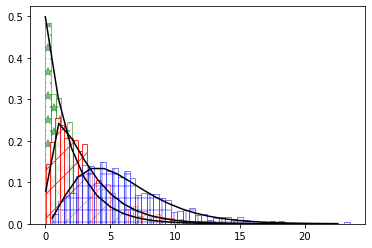

In [122]:
# %matplotlib notebook 
%matplotlib inline
chi2_plots = (
   Chi2DistributionPlot({'size':1000,'df':2,'loc':0,'scale':1},green_style) ,
   Chi2DistributionPlot({'size':1000,'df':3,'loc':0,'scale':1},red_style) ,
   Chi2DistributionPlot({'size':1000,'df':6,'loc':0,'scale':1},blue_style) ,
#    Chi2DistributionPlot({'size':1000,'df':3,'loc':1,'scale':1},red_style) ,
#    Chi2DistributionPlot({'size':1000,'df':4,'loc':1,'scale':1},red_style) ,
)
plot_pdistribution(
    distribution_plots = chi2_plots,
    show_fx   = True
)

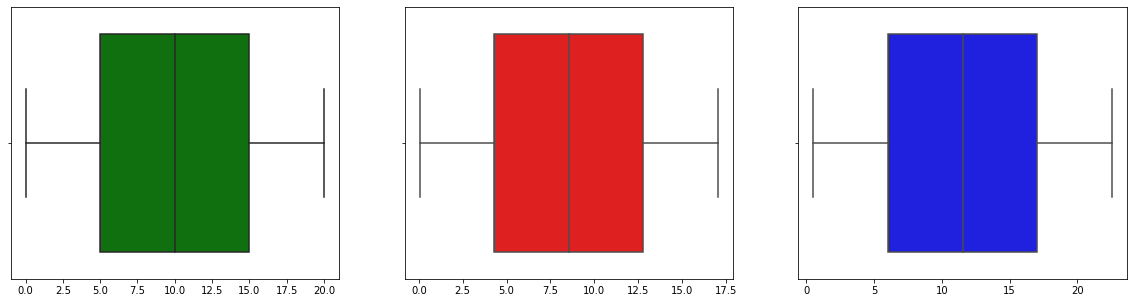

In [208]:
boxplot_pd(chi2_plots)

## F - distribution

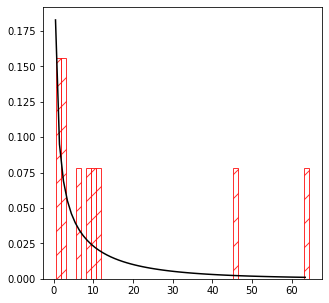

<AxesSubplot:>

In [223]:
size = 10 
f_plots = (
    FDistributionPlot({'size':size,'dfn':1,'dfd':10,'loc':0,'scale':10},red_style),
#     FDistributionPlot({'size':size,'dfn':10,'dfd':20,'loc':0,'scale':10},blue_style),
)
plot_pdistribution(
    distribution_plots = f_plots,
    show_fx            = True ,
    fig_size = (5,5)
)

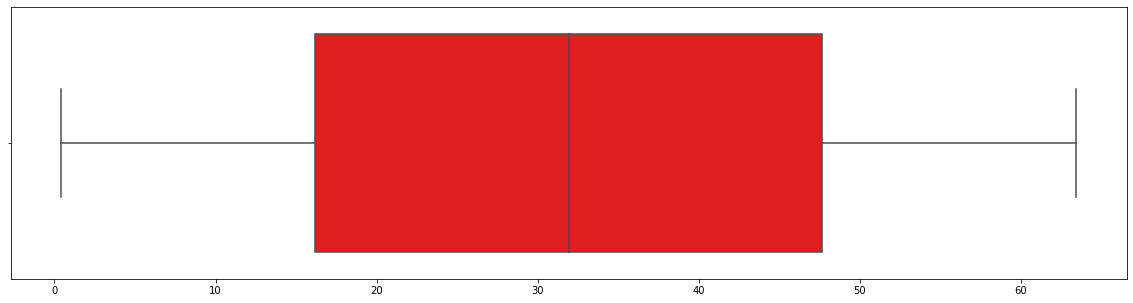

In [226]:
boxplot_pd(f_plots)

# Utils

In [367]:
def plot_pdistribution(**kwargs):
    distributions = kwargs.get("distribution_plots",[])
    show_fx       = kwargs.get("show_fx",False) 
    fig_size      = kwargs.get("fig_size",(10,10))
    bins          = kwargs.get("bins",50)
    _,ax          = plt.subplots(figsize=fig_size)
    if(show_fx):
        ys = list( map( lambda d: d.fx(d.x),distributions ))
        for d,y in zip(distributions,ys):
            ax.plot(d.x,y,color=d.style['edgecolor'],ls ="--",lw=2,marker="o")
    for d in distributions:
        ax.hist(d.data,**d.style,bins=bins,density=True)
    plt.show()
    return ax

In [338]:

def Vector(*args):
    return np.array(args)
default_style = lambda c : {**c,'color':'white'}

class PDistributionPlot(ABC):
    def __init__(self,params,style):
        self.params = params
        self.style  = style
        self.random_state = np.random.RandomState(1234)
        
    @abstractmethod
    def fx(self,x):
        pass
    @abstractmethod
    def random(self):
        pass
class BinomialDistributionPlot(PDistributionPlot):
    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs) 
        self.distribution = stats.binom
        self.data         = self.random() 
        self.x            = np.arange(self.data.min(), self.data.max())
        
    def fx(self,x):
        return self.distribution.pmf(x,n = self.params['n'],p=self.params['p'])
    def random(self):
        return self.distribution.rvs(**self.params,random_state=self.random_state)
#     
class PoissonDistributionPlot(PDistributionPlot):
    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs) 
        self.distribution = stats.poisson
        self.data         = self.random() 
        self.x            = np.arange(self.data.min(), self.data.max())
        
    def fx(self,x):
        return self.distribution.pmf(x,
                                     self.params['mu'],
                                     loc = self.params['loc']
                                    )
    def random(self):
        return self.distribution.rvs(self.params['mu'],
                                     loc=self.params['loc'],
                                     size=self.params['size'],
                                     random_state=self.random_state)
#     
class GaussianDistributionPlot(PDistributionPlot):
    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs) 
        self.distribution = stats.norm
        self.data         = self.random() 
        self.x            = np.arange(self.data.min(), self.data.max())
        
    def fx(self,x):
        return self.distribution.pdf(x,loc=self.params['loc'],scale=self.params['scale']  )
    def random(self):
        return self.distribution.rvs(**self.params,random_state=self.random_state)
    
class TDistributionPlot(PDistributionPlot):
    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs) 
        self.distribution = stats.t
        self.data         = self.random() 
        self.x            = np.arange(self.data.min(), self.data.max())
        
    def fx(self,x):
        return self.distribution.pdf(x,
                                     self.params['df'],
                                     loc=self.params['loc'],
                                     scale=self.params['scale']
                                    )
    def random(self):
        return self.distribution.rvs(**self.params,random_state=self.random_state)
class Chi2DistributionPlot(PDistributionPlot):
    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs) 
        self.distribution = stats.chi2
        self.data         = self.random() 
        self.x            = np.arange(self.data.min(), self.data.max())
        
    def fx(self,x):
        return self.distribution.pdf(x,self.params['df'],loc=self.params['loc'],scale=self.params['scale'])
    def random(self):
        return self.distribution.rvs(**self.params,random_state=self.random_state)
class FDistributionPlot(PDistributionPlot):
    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs) 
        self.distribution = stats.f
        self.data         = self.random() 
        self.x            = np.arange(self.data.min(), self.data.max())
        
    def fx(self,x):
        
        return self.distribution.pdf(x,dfn  = self.params['dfn'],
                                     dfd  = self.params['dfd'],
                                     loc=self.params['loc'],
                                     scale=self.params['scale']
                                    )
    def random(self):
        return self.distribution.rvs(**self.params,random_state=self.random_state)
def boxplot_pd(ds):
    _,ax = plt.subplots(1,len(ds),figsize=(20,5))
    if(len(ds) == 1 ):
        sns.boxplot(x=ds[0].data,ax=ax,color=ds[0].style['edgecolor'])
        return
    for i,d in enumerate(ds):
        sns.boxplot(x=d.data,ax=ax[i],color=d.style['edgecolor'])
red_style = default_style({'edgecolor':"red","hatch":"/",'alpha':.8})
green_style = default_style({'edgecolor':"green","hatch":"*",'alpha':.5})
black_style = default_style({'edgecolor':"black","hatch":".",'alpha':.5})
blue_style = default_style({'edgecolor':"blue","hatch":"+",'alpha':.5})
pink_style = default_style({'edgecolor':"pink","hatch":"O",'alpha':.5})